In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
'''Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

Normal
Suspect
Pathological'''
df = pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
df['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [15]:
df['severe_decelerations'].value_counts()

severe_decelerations
0.000    2106
0.001       7
Name: count, dtype: int64

Text(0, 0.5, '')

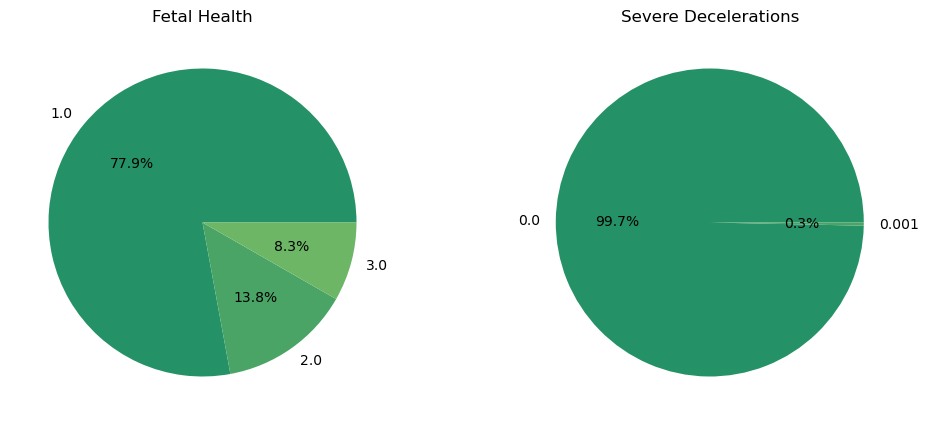

In [24]:
plt.figure(figsize=(12, 5))
sns.set_palette('summer')

plt.subplot(1,2,1)
ax = df['fetal_health'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Fetal Health')
ax.set_ylabel('')


plt.subplot(1,2,2)
ax = df['severe_decelerations'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Severe Decelerations')
ax.set_ylabel('')

In [17]:
df['prolongued_decelerations'].value_counts()

prolongued_decelerations
0.000    1935
0.002      72
0.001      70
0.003      24
0.004       9
0.005       3
Name: count, dtype: int64

In [22]:
df['histogram_number_of_zeroes'].value_counts()

histogram_number_of_zeroes
0.0     1611
1.0      366
2.0      108
3.0       21
4.0        2
5.0        2
10.0       1
8.0        1
7.0        1
Name: count, dtype: int64

Text(0, 0.5, '')

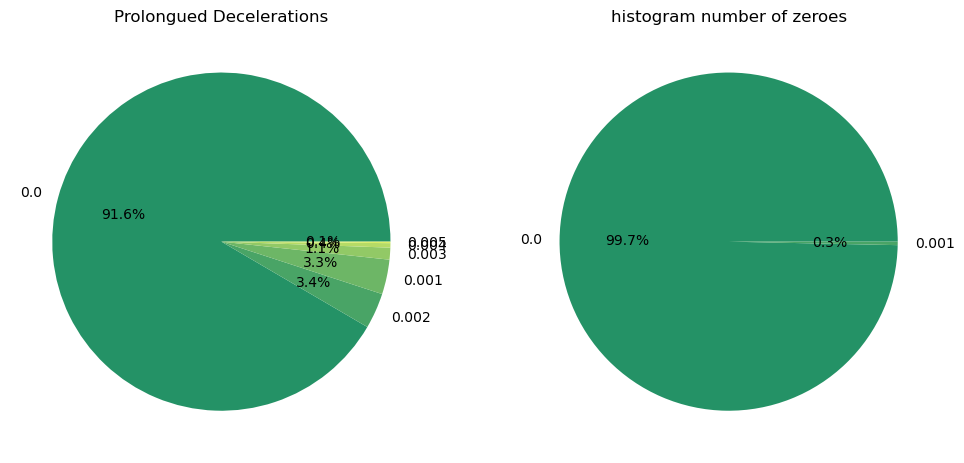

In [27]:
plt.figure(figsize=(12, 7))
sns.set_palette('summer')

plt.subplot(1,2,1)
ax = df['prolongued_decelerations'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Prolongued Decelerations')
ax.set_ylabel('')


plt.subplot(1,2,2)
ax = df['severe_decelerations'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('histogram number of zeroes')
ax.set_ylabel('')

In [8]:
df.shape

(2126, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [11]:
df.duplicated().sum()

13

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [30]:
X = df.drop(columns='fetal_health')
y = df['fetal_health']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

In [72]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
print("Accuracy of Decisiontree: ", accuracy_score(y_test, dtree_predictions) * 100, "%\n")
svc_score = round(accuracy_score(y_test, dtree_predictions) * 100)

Accuracy of Decisiontree:  91.01654846335697 %



In [62]:
cm = confusion_matrix(y_test, dtree_predictions) 

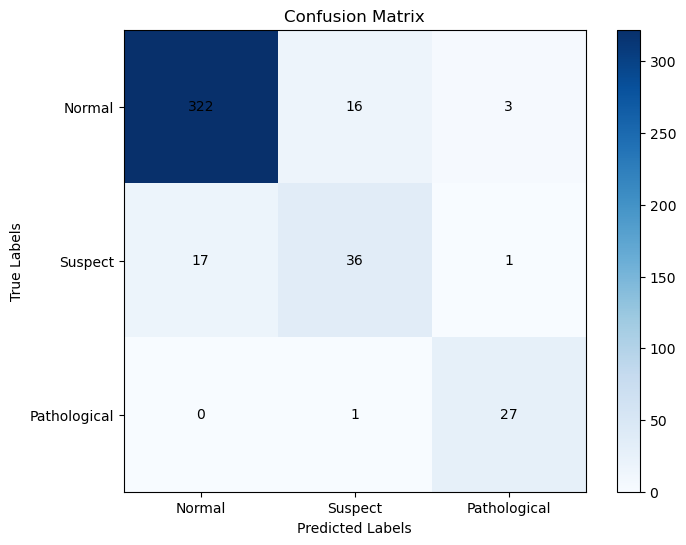

In [63]:
class_labels = ['Normal', 'Suspect', 'Pathological']
assert cm.shape[0] == cm.shape[1], "Confusion matrix should be square"

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add colorbar
plt.colorbar()

# Set ticks for both axes
tick_marks = np.arange(len(cm))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Add text annotations
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.show()

In [65]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_predictions = forest.predict(X_test)
forest_predictions[0:10]
y_test[0:10]
print("Accuracy of Random Forest: {}%".format(forest.score(X_test, y_test) * 100 ), "\n")
randomf_score = round(forest.score(X_test, y_test) * 100 ,2)

Accuracy of Random Forest: 96.6903073286052% 



In [66]:
cm = confusion_matrix(y_test, forest_predictions) 

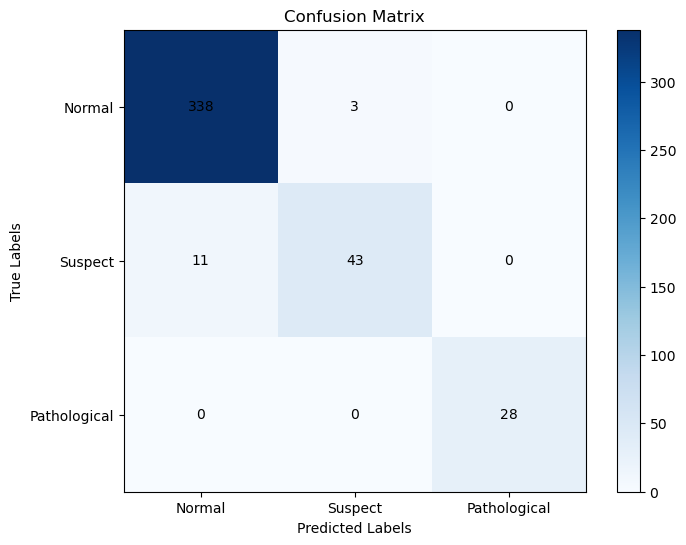

In [67]:
class_labels = ['Normal', 'Suspect', 'Pathological']
assert cm.shape[0] == cm.shape[1], "Confusion matrix should be square"

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add colorbar
plt.colorbar()

# Set ticks for both axes
tick_marks = np.arange(len(cm))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Add text annotations
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.show()

In [68]:
svm = SVC(kernel = 'linear', C = 1.0, random_state = 42)
svm.fit(X_train, y_train)
y_svm_test = svm.predict(X_test)
print("Accuracy of SVC: ", accuracy_score(y_test, y_svm_test) * 100, "%\n")
svc_score = round(accuracy_score(y_test, y_svm_test) * 100)

Accuracy of SVC:  90.0709219858156 %



In [69]:
cm = confusion_matrix(y_test, y_svm_test) 

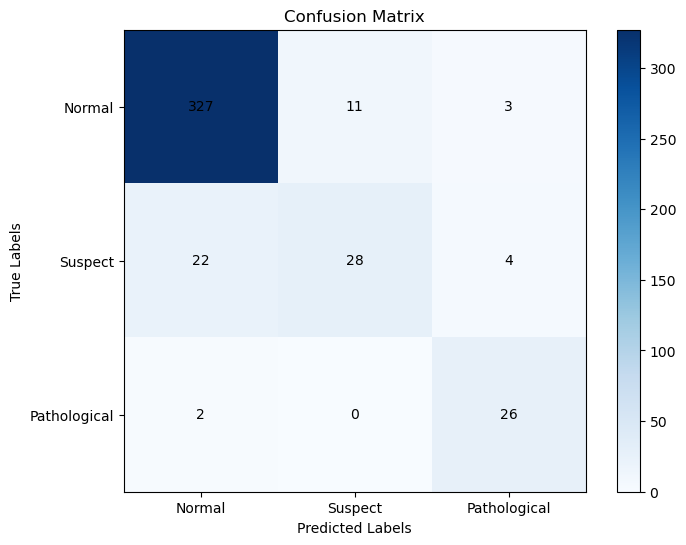

In [70]:
class_labels = ['Normal', 'Suspect', 'Pathological']
assert cm.shape[0] == cm.shape[1], "Confusion matrix should be square"

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add colorbar
plt.colorbar()

# Set ticks for both axes
tick_marks = np.arange(len(cm))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Add text annotations
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.show()